# New Approach 
# Hacker Earth : ML Problem 

| Submission ID | Approaches | Score |
|--- | -- |  --- |


In [48]:
#Import the libraries

import numpy as np;
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import label encoder
from sklearn import preprocessing

import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV


#Read train and Testdata

df = pd.read_csv("train.csv",index_col='Property_ID')
df_test = pd.read_csv("test.csv",index_col='Property_ID')

y = df['Habitability_score']   


In [49]:
df.describe

<bound method NDFrame.describe of                   Property_Type  Property_Area  Number_of_Windows  \
Property_ID                                                         
0x21e3                Apartment            106                NaN   
0x68d4                Apartment            733                2.0   
0x7d81                Apartment            737                4.0   
0x7a57                Apartment            900                3.0   
0x9409                 Bungalow           2238               14.0   
...                         ...            ...                ...   
0x6e26       Single-family home           1120                3.0   
0xa013                Apartment            445                1.0   
0x9721                 Bungalow           3780                6.0   
0x7e25       Single-family home           1266                3.0   
0x8cb4       Single-family home           1229                2.0   

             Number_of_Doors       Furnishing  Frequency_of_Powercut

From the above output, the dataset is a mix and match of numerical and categorical features. Find the unique values in the columns.



In [50]:
#Find the columns
categorical_columns = [col for col in df.columns if  df[col].dtype == "object"]

print(categorical_columns)

#Find the unique values in the column 

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])
    print(df[col].value_counts())
    

#Seems like Garbage Values in the Property Type - 

['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise']
Apartment             14596
Single-family home    11477
Duplex                 5806
Bungalow               4238
Container Home         2872
#R%$G&867               510
Name: Property_Type, dtype: int64
Semi_Furnished     21399
Unfurnished        10344
Fully Furnished     7756
Name: Furnishing, dtype: int64
No               29714
Yes               8957
NOT MENTIONED      828
Name: Power_Backup, dtype: int64
All time                   19511
Once in a day - Morning     9897
Once in a day - Evening     7815
Once in two days            1931
NOT MENTIONED                345
Name: Water_Supply, dtype: int64
Well below average        20259
Slightly below average    11580
Slightly above average     5303
Well above average         2357
Name: Crime_Rate, dtype: int64
Medium    34215
High       3212
Low        2072
Name: Dust_and_Noise, dtype: int64


In [51]:
df["Property_Type"].value_counts()

df["Property_Type"] = df["Property_Type"].replace("#R%$G&867", "Duplex")

df["Property_Type"].value_counts()

Apartment             14596
Single-family home    11477
Duplex                 6316
Bungalow               4238
Container Home         2872
Name: Property_Type, dtype: int64

Now apply **Encoding** techniques and convert all the categorical cols to the numerical cols.
**Note**: Since we have test dataset, both should be modified, to have consistent result.(This scenario will be applicable when we split the data ourself into test and train.)

In [52]:
  
#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
for col in categorical_columns:
        df[col]= label_encoder.fit_transform(df[col])
        df_test[col]= label_encoder.fit_transform(df_test[col])
 

In [53]:
#Now print the Dataset 

df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,,,,,,,
0x21e3,0,106,NaN,1,1,0.0,1,3,5.89,1,2,90.0,3.86,71.98
0x68d4,0,733,2.0,2,2,1.0,1,2,4.37,3,2,96.0,3.55,71.20
0x7d81,0,737,4.0,2,0,0.0,1,3,7.45,1,2,121.0,3.81,71.39
0x7a57,0,900,3.0,2,2,2.0,2,3,6.16,2,2,100.0,1.34,31.46
0x9409,1,2238,14.0,6,0,0.0,1,0,5.46,3,2,116.0,4.77,93.70


In [54]:
print(df.describe())

       Property_Type  Property_Area  Number_of_Windows  Number_of_Doors  \
count   39499.000000   39499.000000       37845.000000     39499.000000   
mean        1.894681    1391.715638           3.923768         2.331375   
std         1.701925    1953.287544           2.690992         1.179964   
min         0.000000     100.000000           0.000000         1.000000   
25%         0.000000     494.000000           2.000000         1.000000   
50%         2.000000     932.000000           4.000000         2.000000   
75%         4.000000    1770.000000           5.000000         3.000000   
max         4.000000   28064.000000          15.000000         6.000000   

         Furnishing  Frequency_of_Powercuts  Power_Backup  Water_Supply  \
count  39499.000000            38116.000000  39499.000000  39499.000000   
mean       1.065521                0.484678      1.205803      1.351680   
std        0.673764                0.752207      0.453187      1.417895   
min        0.000000     

In [55]:
#Now Drop the target colum from the dataset for modelling

# df.dropna(axis=0, subset=['Habitability_score'], inplace=True)

# y = df['Habitability_score']             
# df.drop(['Habitability_score'], axis=1, inplace=True)

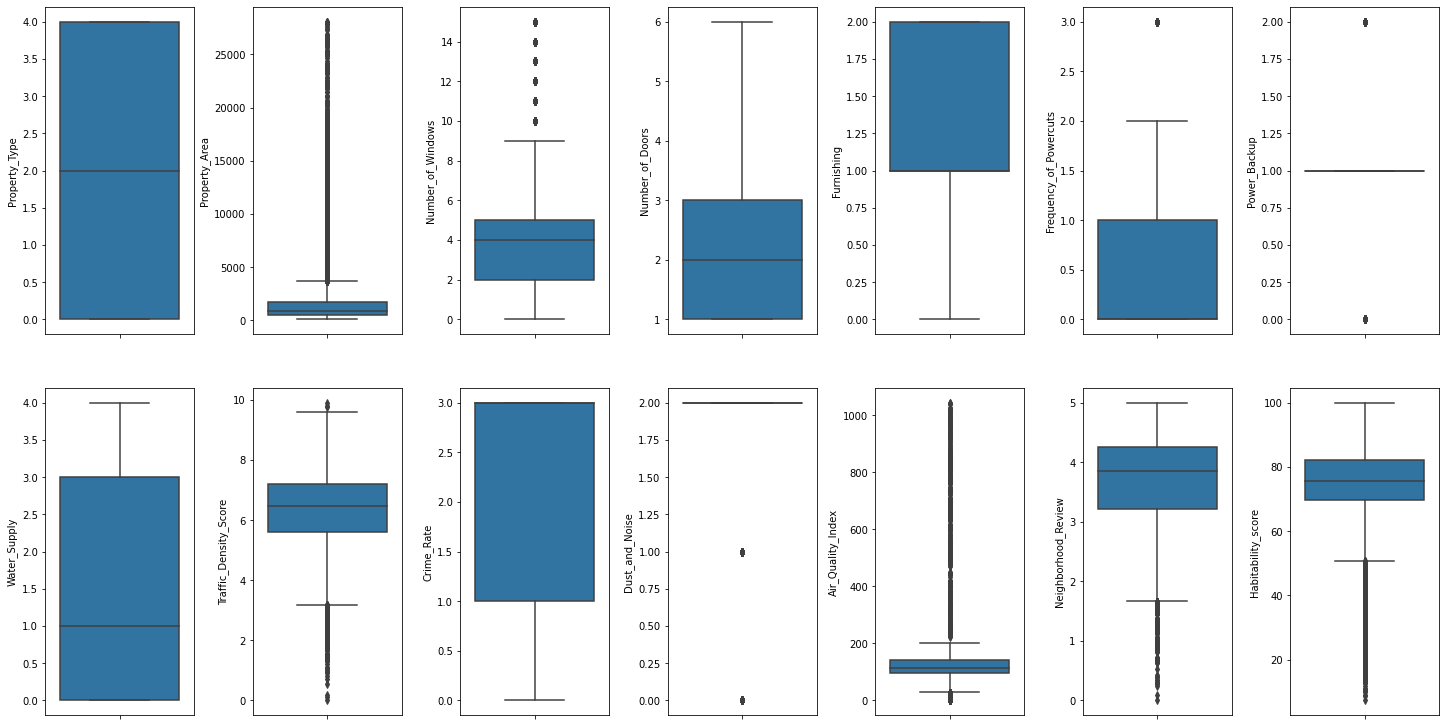

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [57]:
# Find the Outliers
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Property_Type outliers = 0.00%
Column Property_Area outliers = 4.30%
Column Number_of_Windows outliers = 5.05%
Column Number_of_Doors outliers = 2.27%
Column Furnishing outliers = 0.00%
Column Frequency_of_Powercuts outliers = 3.02%
Column Power_Backup outliers = 100.00%
Column Water_Supply outliers = 0.00%
Column Traffic_Density_Score outliers = 1.36%
Column Crime_Rate outliers = 0.00%
Column Dust_and_Noise outliers = 100.00%
Column Air_Quality_Index outliers = 2.00%
Column Neighborhood_Review outliers = 1.58%
Column Habitability_score outliers = 8.39%


C:\Users\z0044whz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\z0044whz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\z0044whz\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

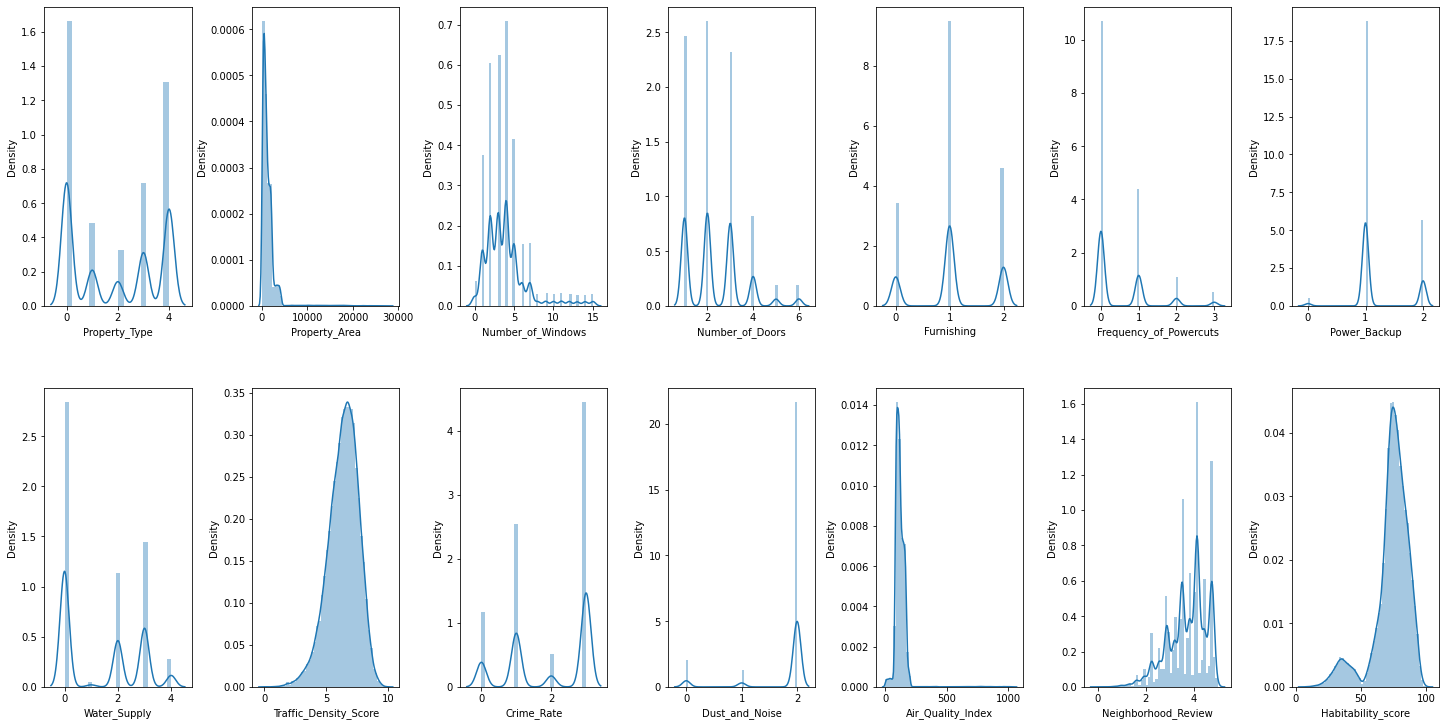

In [58]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Seems like the Property Area, Air Quality Index, Number of Windows.

<AxesSubplot:>

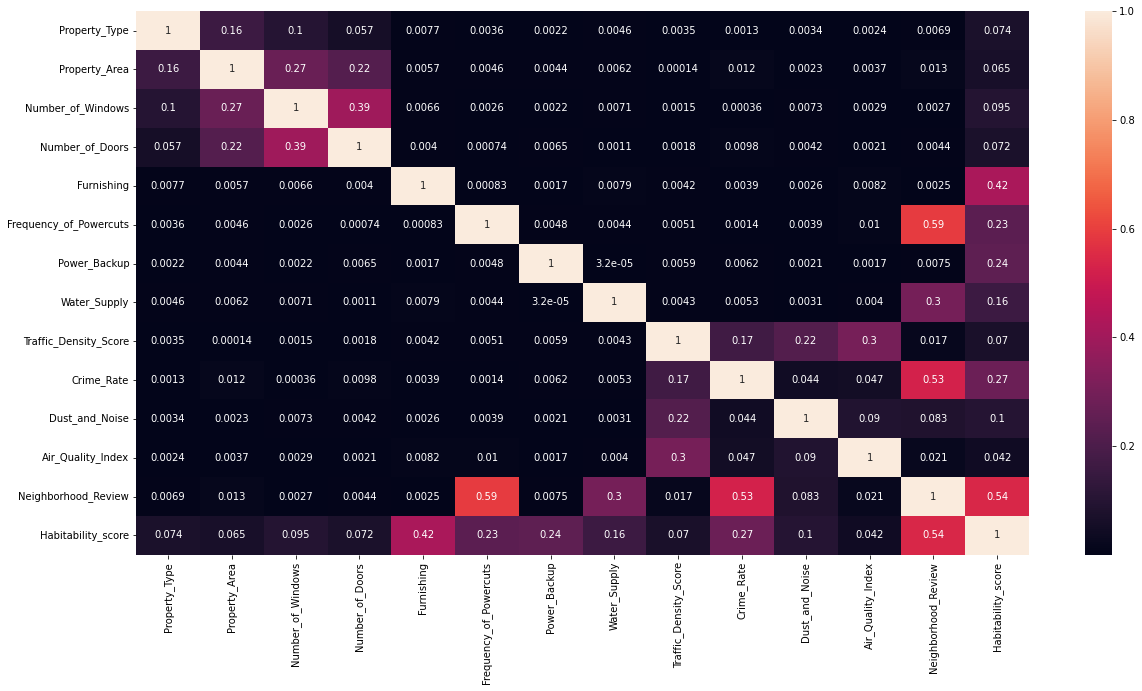

In [59]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

We can drop the columns **Frequency_of_PowerCuts** and **Number_of_Windows** and generate the grph again

In [60]:
# df.drop(['Frequency_of_Powercuts'],axis=1,inplace=True);

# df.drop(['Number_of_Windows'],axis=1,inplace=True);
# df_test.drop(['Frequency_of_Powercuts'],axis=1,inplace=True);

# df_test.drop(['Number_of_Windows'],axis=1,inplace=True);

<AxesSubplot:>

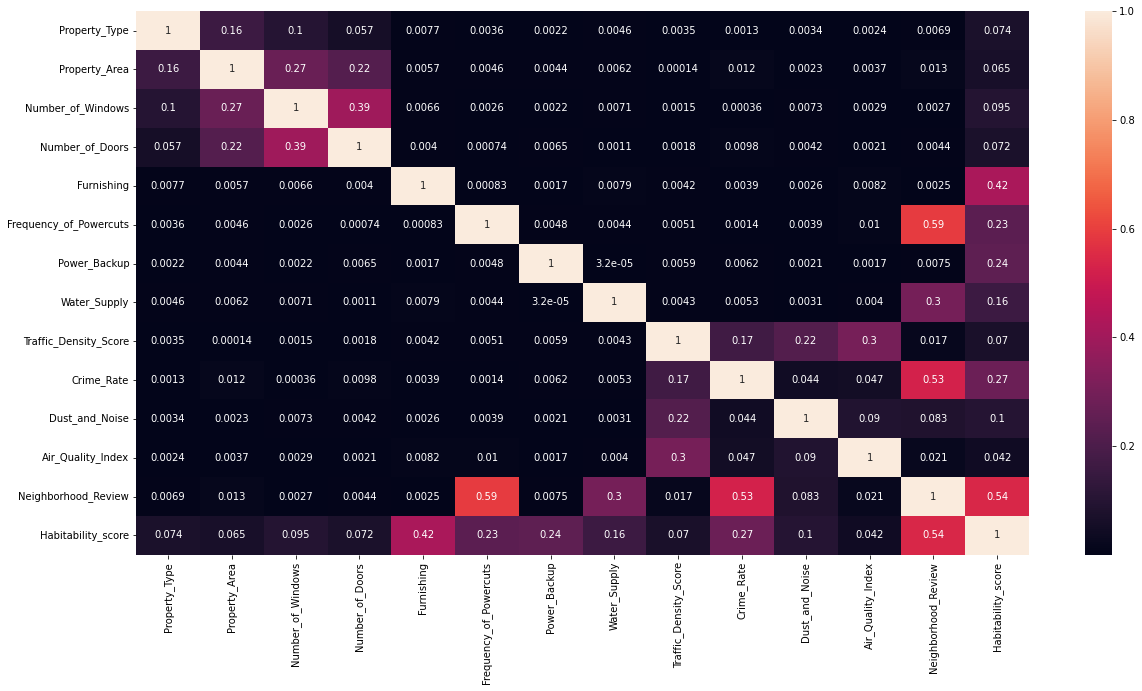

In [61]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

From the graph, Neighborhood_Review and Frequency_of_powercuts are highly correlated. 


In [62]:

df['Frequency_of_Powercuts'] = df['Frequency_of_Powercuts'].fillna(df['Frequency_of_Powercuts'].mean())
df['Number_of_Windows'] = df['Number_of_Windows'].fillna(df['Number_of_Windows'].mean())

df_test['Frequency_of_Powercuts'] = df_test['Frequency_of_Powercuts'].fillna(df_test['Frequency_of_Powercuts'].mean())
df_test['Number_of_Windows'] = df_test['Number_of_Windows'].fillna(df_test['Number_of_Windows'].mean())

In [63]:
df_test['Number_of_Windows'].value_counts()


4.000000     2097
2.000000     1924
3.000000     1910
1.000000     1143
5.000000     1135
6.000000      497
7.000000      489
3.897563      445
0.000000      165
12.000000      97
9.000000       95
13.000000      90
15.000000      86
14.000000      83
11.000000      82
8.000000       81
10.000000      81
Name: Number_of_Windows, dtype: int64

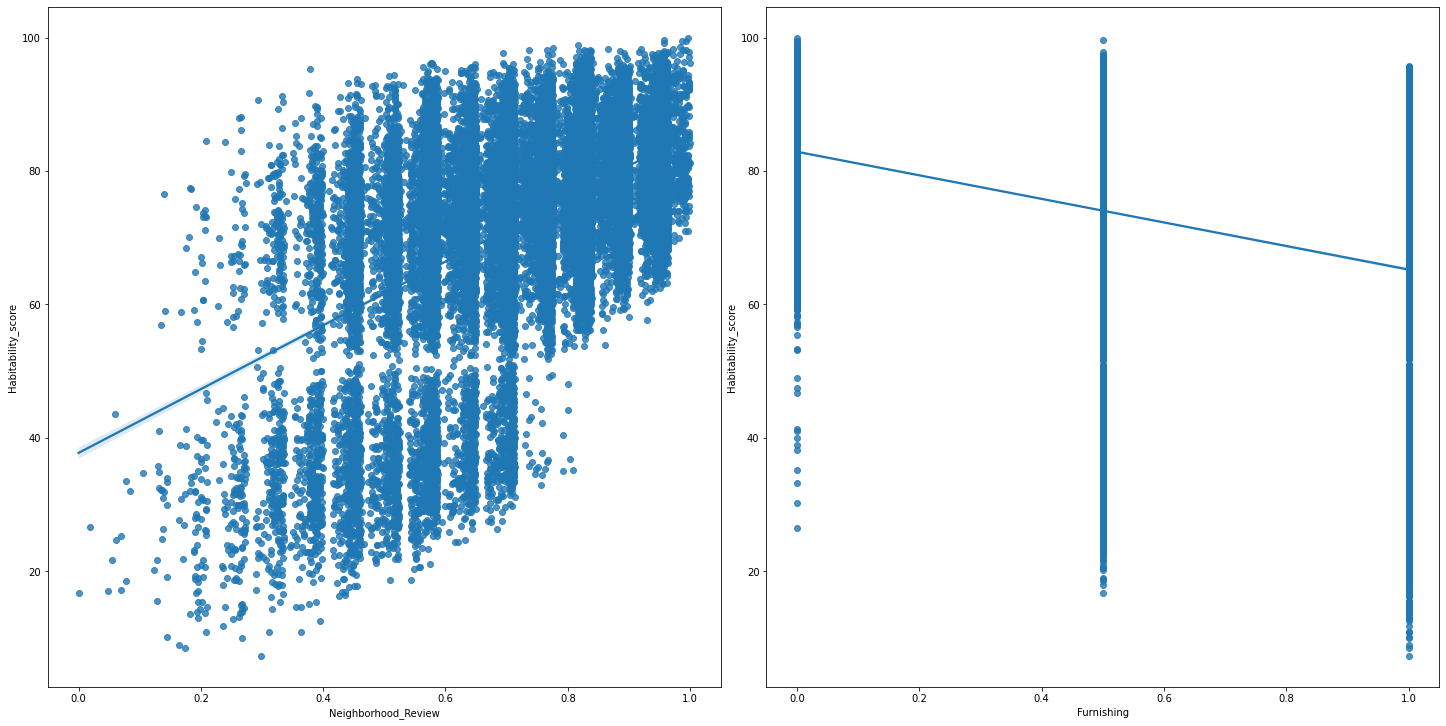

In [64]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['Neighborhood_Review', 'Furnishing']
x = df.loc[:,column_sels]
 
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [65]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [66]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.00 (+/- 0.00)
MSE: -0.00 (+/- 0.00)
MSE: -0.00 (+/- 0.00)


|MSE | Learning Rate |
| -- | -- | 
|41.41 | 0.08 |  
| 41.31 | 0.09 | 
| 41.00 | 0.10 | 
| 40.75 | 0.12 | 
|  40.28| 0.20 | 
| 41.70 | 0.50 (BAD) | 
|  40.65| 0.40 (BAD) | 
| 40.02 | 0.27 | 

| MSE | Alpha| Remarks|
|-- | -- | -- |
| 40.02 | 0.9 | with learning rate as 0.27 | 
| 40.02 | 0.8 | |
| 39.96 | 0.8 | n_estimators=200 |

In [68]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.8,learning_rate=0.30,
                                max_depth=5, min_samples_leaf=5,
                                min_samples_split=2, n_estimators=100, random_state=42)
 
scores = cross_val_score(gbr, df, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.00 (+/- 0.00)


In [69]:
df.head()

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
Property_ID,,,,,,,,,,,,,,
0x21e3,0,106,3.923768,1,1,0.0,1,3,5.89,1,2,90.0,3.86,71.98
0x68d4,0,733,2.000000,2,2,1.0,1,2,4.37,3,2,96.0,3.55,71.20
0x7d81,0,737,4.000000,2,0,0.0,1,3,7.45,1,2,121.0,3.81,71.39
0x7a57,0,900,3.000000,2,2,2.0,2,3,6.16,2,2,100.0,1.34,31.46
0x9409,1,2238,14.000000,6,0,0.0,1,0,5.46,3,2,116.0,4.77,93.70


In [70]:
#print(df.isna().sum())

df.drop(['Frequency_of_Powercuts'],axis=1,inplace=True);
df.drop(['Number_of_Windows'],axis=1,inplace=True);
df_test.drop(['Frequency_of_Powercuts'],axis=1,inplace=True);
df_test.drop(['Number_of_Windows'],axis=1,inplace=True);
 
print(df_test.isna().sum())

Property_Type            0
Property_Area            0
Number_of_Doors          0
Furnishing               0
Power_Backup             0
Water_Supply             0
Traffic_Density_Score    0
Crime_Rate               0
Dust_and_Noise           0
Air_Quality_Index        0
Neighborhood_Review      0
dtype: int64


In [ ]:
df_test.isna().sum()

Property_Type            0
Property_Area            0
Number_of_Doors          0
Furnishing               0
Power_Backup             0
Water_Supply             0
Traffic_Density_Score    0
Crime_Rate               0
Dust_and_Noise           0
Air_Quality_Index        0
Neighborhood_Review      0
dtype: int64

In [71]:
#Now Drop the target colum from the dataset for modelling

df.dropna(axis=0, subset=['Habitability_score'], inplace=True)

y = df['Habitability_score']             
df.drop(['Habitability_score'], axis=1, inplace=True)

In [72]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()



,Property_Type,Property_Area,Number_of_Doors,Furnishing,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0.00,0.000215,0.0,0.5,0.5,0.75,0.594349,0.333333,1.0,0.086207,0.772
1,0.00,0.022636,0.2,1.0,0.5,0.50,0.440969,1.000000,1.0,0.091954,0.710
2,0.00,0.022779,0.2,0.0,0.5,0.75,0.751766,0.333333,1.0,0.115900,0.762
3,0.00,0.028608,0.2,1.0,1.0,0.75,0.621594,0.666667,1.0,0.095785,0.268
4,0.25,0.076455,1.0,0.0,0.5,0.00,0.550959,1.000000,1.0,0.111111,0.954


In [73]:
df.head()

,Property_Type,Property_Area,Number_of_Doors,Furnishing,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
Property_ID,,,,,,,,,,,
0x21e3,0,106,1,1,1,3,5.89,1,2,90.0,3.86
0x68d4,0,733,2,2,1,2,4.37,3,2,96.0,3.55
0x7d81,0,737,2,0,1,3,7.45,1,2,121.0,3.81
0x7a57,0,900,2,2,2,3,6.16,2,2,100.0,1.34
0x9409,1,2238,6,0,1,0,5.46,3,2,116.0,4.77


In [74]:
 
gbr.fit(df,y) 
# xgb_grid = GridSearchCV(gbr,
#                         cv = 2,
#                         n_jobs = 5,
#                         verbose=True)

# xgb_grid.fit(df,y)
# print(xgb_grid.best_score_)
# print(xgb_grid.best_params_)

GradientBoostingRegressor(alpha=0.8, learning_rate=0.3, max_depth=5,
                          min_samples_leaf=5, random_state=42)

In [25]:
y

Property_ID
0x21e3    71.98
0x68d4    71.20
0x7d81    71.39
0x7a57    31.46
0x9409    93.70
          ...  
0x6e26    73.43
0xa013    79.91
0x9721    81.44
0x7e25    71.33
0x8cb4    83.25
Name: Habitability_score, Length: 39499, dtype: float64

In [75]:
from sklearn.pipeline import Pipeline

model_pipeline = Pipeline(steps=[("model_run", gbr)
])

# Fitting the input and predicting the results
model_pipeline.fit(df, y)

Pipeline(steps=[('model_run',
                 GradientBoostingRegressor(alpha=0.8, learning_rate=0.3,
                                           max_depth=5, min_samples_leaf=5,
                                           random_state=42))])

In [76]:
preds = model_pipeline.predict(df_test)
output = pd.DataFrame({"Property_ID": df_test.index, "Habitability_score": preds})
output.to_csv("new.csv", index=False)
output.head()

,Property_ID,Habitability_score
0,0x6e93,22.425688
1,0x8787,79.694207
2,0x6c17,67.318972
3,0x9dbd,74.298237
4,0xbfde,71.215656


In [28]:
# Import the reqquired packages
from sklearn.preprocessing import PolynomialFeatures, scale

# Generate polynomial features
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(df))

# Check the shape of the generated feature set
print(X_poly.shape)

(39499, 77)


In [30]:
# Fit the Regression model
import statsmodels.api as sm
df = sm.add_constant(df)
lr_sm = sm.OLS(y, df).fit()

# Obtain the model summary
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Habitability_score   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     4359.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:16:44   Log-Likelihood:            -1.4492e+05
No. Observations:               39499   AIC:                         2.899e+05
Df Residuals:                   39487   BIC:                         2.900e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    37.26

In [31]:
# Fit the Regression model on feature engineered dataset
import statsmodels.api as sm
X = sm.add_constant(X_poly)
lr_sm = sm.OLS(y, X).fit()

# Obtain the model summary
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     Habitability_score   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1089.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:18:46   Log-Likelihood:            -1.3811e+05
No. Observations:               39499   AIC:                         2.764e+05
Df Residuals:                   39421   BIC:                         2.770e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.7703      0.190    403.215      0.0

In [79]:
# Import the required packages
from sklearn.linear_model import Ridge

# Create a ridge model with alpha=1
ridge = Ridge(alpha=1).fit(df, y)

# Obtain the model predictions for the test dataset
y_pred = ridge.predict(df_test)

model_pipeline = Pipeline(steps=[("model_run", ridge)
])

preds = model_pipeline.predict(df_test)
output = pd.DataFrame({"Property_ID": df_test.index, "Habitability_score": preds})
output.to_csv("new-ridge.csv", index=False)
print(output.head())

# Fitting the input and predicting the results
model_pipeline.fit(df, y)

# Obtain the R-Squared performace metric
train_score_ridge = ridge.score(df, y)
#test_score_ridge = ridge.score(X_test, y_test)

print("The train score for ridge regression model is: ", np.round(train_score_ridge, 2))
#print("The test score for ridge regression model is: ", np.round(test_score_ridge, 2))

  Property_ID  Habitability_score
0      0x6e93           49.961937
1      0x8787           74.389392
2      0x6c17           65.580573
3      0x9dbd           67.482489
4      0xbfde           69.898856
The train score for ridge regression model is:  0.55


In [40]:
# Declare the range of alpha for which you need to run the model
param_grid = {'alpha': np.logspace(-3, 3, 14)}
print(param_grid)

{'alpha': array([1.00000000e-03, 2.89426612e-03, 8.37677640e-03, 2.42446202e-02,
       7.01703829e-02, 2.03091762e-01, 5.87801607e-01, 1.70125428e+00,
       4.92388263e+00, 1.42510267e+01, 4.12462638e+01, 1.19377664e+02,
       3.45510729e+02, 1.00000000e+03])}


In [81]:
# Create a grid and fit the dataset
grid = GridSearchCV(Ridge(), param_grid, cv=5, return_train_score=True)
grid.fit(df, y)


model_pipeline = Pipeline(steps=[("model_run", grid)
])

preds = model_pipeline.predict(df_test)
output = pd.DataFrame({"Property_ID": df_test.index, "Habitability_score": preds})
output.to_csv("new-grid.csv", index=False)
print(output.head())

# Obtain the model parameters with highest scores
print(grid.best_params_)
print(grid.best_score_)

  Property_ID  Habitability_score
0      0x6e93           49.966647
1      0x8787           74.389580
2      0x6c17           65.582070
3      0x9dbd           67.483335
4      0xbfde           69.900492
{'alpha': 4.923882631706742}
0.5479377227744847


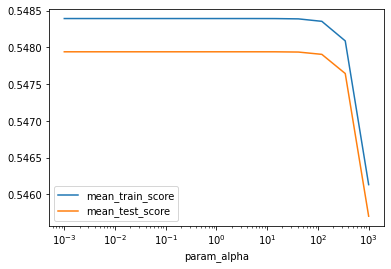

In [42]:
# Convert the grid results into a DataFrame and plot the train and test scores
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score', ax=plt.gca())
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.legend()

# Provide legend to plot and cpnvert x-axis to logarithmic scale
plt.xscale("log")

In [96]:
#lasso Regression 
from sklearn.linear_model import Lasso
# Create an instance of Lasso Regression implementation
#
lasso = Lasso(alpha=0.8)
#
# Fit the Lasso model
#
lasso.fit(df, y)
#
# Create the model score
#
lasso.score(df, y)

model_pipeline = Pipeline(steps=[("model_run", lasso)
])

preds = model_pipeline.predict(df_test)
output = pd.DataFrame({"Property_ID": df_test.index, "Habitability_score": preds})
output.to_csv("new-lasso.csv", index=False)
print(output.head())


  Property_ID  Habitability_score
0      0x6e93           55.521592
1      0x8787           76.241283
2      0x6c17           66.579976
3      0x9dbd           69.910599
4      0xbfde           72.152834


In [85]:
from sklearn.linear_model import LassoCV
#
# Create an instance of Lasso Regression implementation
#
lasso_cv = LassoCV(cv=5)
#
# Fit the Lasso model
#
lasso_cv.fit(df, y)
#
# Create the model score
#
lasso_cv.score(df, y)

model_pipeline = Pipeline(steps=[("model_run", lassocv)
])

preds = model_pipeline.predict(df_test)
output = pd.DataFrame({"Property_ID": df_test.index, "Habitability_score": preds})
output.to_csv("new-lassocv.csv", index=False)
print(output.head())


0.41363762989154496

In [84]:
lasso.coef_

array([ 1.48095630e-01,  4.15514251e-04,  1.36096648e-02, -6.64907157e+00,
        2.79643922e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -6.58955810e-03,  7.99294454e+00])